<a href="https://colab.research.google.com/github/Jian-Chueng/Book/blob/master/Convolutional%20Neural%20Networks/convolutionalNN_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras.utils.np_utils import to_categorical
from keras.models import Model
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
import random

In [48]:
# --------------------
np.random.seed(0)
# --------------------
(X_train, y_train), (X_test, y_test) =  mnist.load_data()

print(X_train.shape)
print(X_test.shape)

assert (X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert (X_train.shape[1:] == (28, 28)), "The dimensions of the images are not 28 x 28."
assert (X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert (X_test.shape[1:] == (28, 28)), "The dimensions of the images are not 28 x 28."


(60000, 28, 28)
(10000, 28, 28)


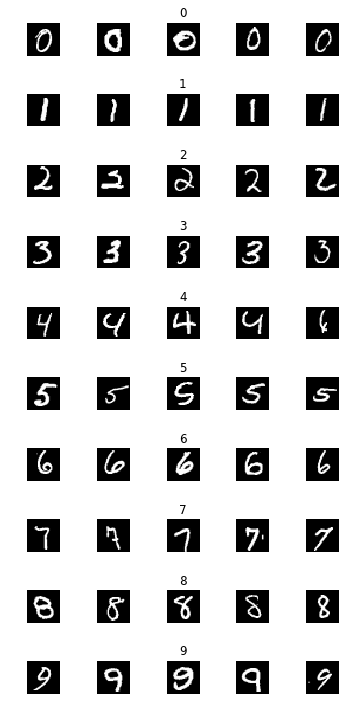

In [49]:
num_of_samples = []

cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5, 10))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, (len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

# --------------------

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


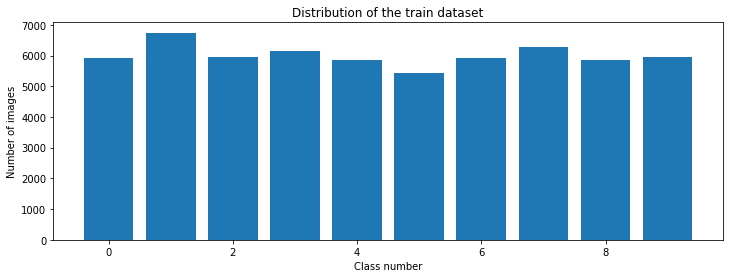

In [50]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()
# --------------------

In [0]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)
# --------------------

In [0]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

X_train = X_train / 255
X_test = X_test / 255
# -End of starter code-

In [0]:
# define the leNet_model function:

def leNet_model():
  # create model
  model = Sequential()
  model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Conv2D(15, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  # Randomly setting a fraction or rate of input units to zero at each update during
  # training, which helps prevent overfitting
  # 0: no node drops out,1 all input nodes are droped out during each update  
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  # Compile model
  model.compile(Adam(lr = 0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model
  

Randomly setting a fraction or rate of input units to zero at each update
during training, which helps prevent overfitting.\
Force the neural network to use various combinations of nodes to classify
the same data.\
As with each update, a random set of nodes survives and drops out process\
Each node is forced to learn the data set in a more independent way with
a unique neural arrangement each time\
This causes the neural network in general to become more versatile and 
allows the weights to be more uniformly distributed along that network.


In [54]:
model= leNet_model()
print(model.summary())

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 500)               188000    
_____

In [55]:
history=model.fit(X_train, y_train, epochs=10,  validation_split = 0.1, batch_size = 400, verbose = 1, shuffle = 1)


Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 33s 611us/step - loss: 0.2444 - acc: 0.9214 - val_loss: 0.0462 - val_acc: 0.9868
Epoch 2/10
54000/54000 [==============================] - 32s 599us/step - loss: 0.0683 - acc: 0.9790 - val_loss: 0.0420 - val_acc: 0.9873
Epoch 3/10
54000/54000 [==============================] - 32s 598us/step - loss: 0.0588 - acc: 0.9817 - val_loss: 0.0443 - val_acc: 0.9880
Epoch 4/10
54000/54000 [==============================] - 32s 598us/step - loss: 0.0520 - acc: 0.9842 - val_loss: 0.0413 - val_acc: 0.9875
Epoch 5/10
54000/54000 [==============================] - 32s 595us/step - loss: 0.0437 - acc: 0.9862 - val_loss: 0.0368 - val_acc: 0.9902
Epoch 6/10
54000/54000 [==============================] - 32s 597us/step - loss: 0.0406 - acc: 0.9871 - val_loss: 0.0387 - val_acc: 0.9883
Epoch 7/10
54000/54000 [==============================] - 32s 596us/step - loss: 0.0378 - acc: 0.9882 - val_loss: 0.0

Text(0.5, 0, 'epoch')

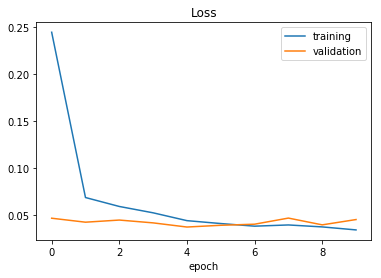

In [56]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')

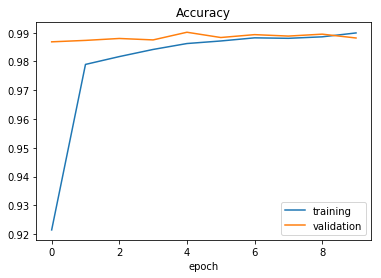

In [57]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
score = model.evaluate(X_test, y_test, verbose=0)

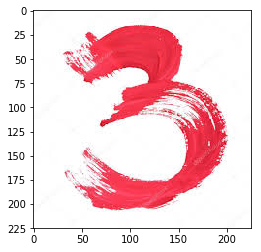

In [58]:
import requests
from PIL import Image

url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcST8KzXHtkSHcxzdpnllMhAj0upLEwnNFdtY6j4YUPcmaf4Ty3u'

r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))


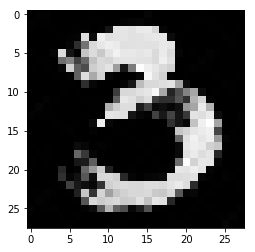

In [59]:
import cv2

img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [0]:
img = img / 255
img = img.reshape(1, 28, 28, 1)

In [61]:
prediction = model.predict_classes(img)
print("predicted digit:", str(prediction))

predicted digit: [3]


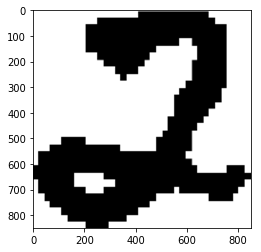

In [62]:
import requests
from PIL import Image

url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream=True)
# print(response)
img = Image.open(response.raw)
plt.imshow(img)

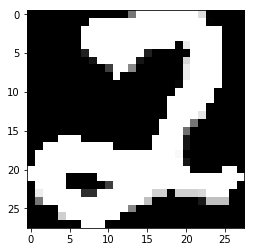

In [63]:
import cv2

img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [0]:
img = img / 255
img = img.reshape(1, 28, 28, 1)

In [65]:
prediction = model.predict_classes(img)
print("predicted digit:", str(prediction))

predicted digit: [2]


In [66]:
score = model.evaluate(X_test, y_test, verbose=0)

print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.03875044786970079
Test accuracy: 0.99


In [76]:
layer1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
layer2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)

visual_layer1, visual_layer2 = layer1.predict(img), layer2.predict(img)

print(visual_layer1.shape)
print(visual_layer2.shape)

(1, 24, 24, 30)
(1, 10, 10, 15)


This essentially means that visual layer 1 contains 30 outputs one for each filter of dimension 24 by 24.

While visual layer 2 contains 15 outputs and again one for each filter of dimension 10 by 10.

*   red signifying high intensity 
*   blue signifies low intensity

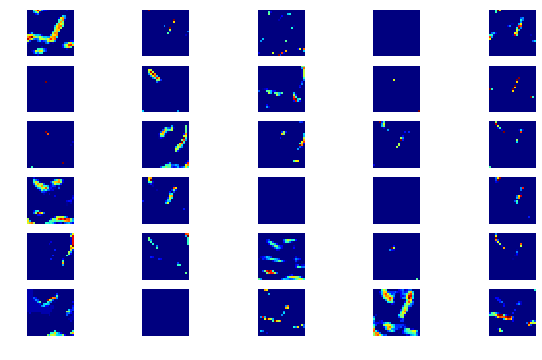

In [77]:
# layer1
plt.figure(figsize=(10, 6))
for i in range(30):
  plt.subplot(6, 5, i+1) #plot the preceding image.
  plt.imshow(visual_layer1[0, :, :, i], cmap = plt.get_cmap('jet'))
  #"jet": effectively highlight the different pixel values in our image.
  plt.axis('off')

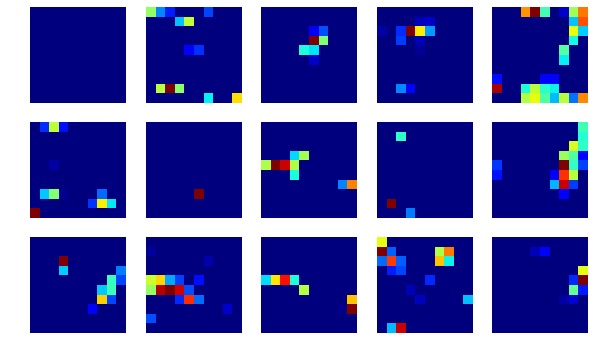

In [78]:
# layer1
plt.figure(figsize=(10, 6))
for i in range(15):
  plt.subplot(3, 5, i+1) #plot the preceding image.
  plt.imshow(visual_layer2[0, :, :, i], cmap = plt.get_cmap('jet'))
  #"jet": effectively highlight the different pixel values in our image.
  plt.axis('off')

The feature maps start to become **unrecognizable towards the very end** as they contain less information about the image.

But **more information about the specific feature that's distinct to the kernel** that was involved on the image since the deeper you get into the neural network.